In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
norm?

Signature:       norm(*args, **kwds)
Type:            norm_gen
String form:     <scipy.stats._continuous_distns.norm_gen object at 0x2add46f7db10>
File:            ~/anaconda/envs/py37/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A normal continuous random variable.

The location (``loc``) keyword specifies the mean.
The scale (``scale``) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=

(array([9.53909743e-05, 1.98201247e-03, 1.88096869e-02, 7.33768573e-02,
        1.27255093e-01, 9.57831372e-02, 3.13624326e-02, 4.33498983e-03,
        2.82639924e-04, 1.76649952e-05]),
 array([-8.18451223, -5.35405576, -2.5235993 ,  0.30685717,  3.13731363,
         5.9677701 ,  8.79822656, 11.62868303, 14.45913949, 17.28959596,
        20.12005242]),
 [<matplotlib.patches.Polygon at 0x2add4979c310>])

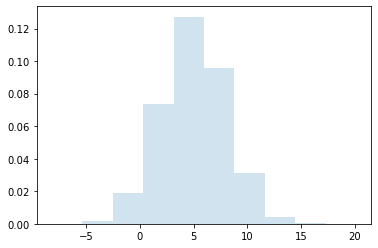

In [15]:
gau = norm(loc = 5, scale = 3)
plt.hist(gau.rvs(100000), density=True, histtype='stepfilled', alpha=0.2)

In [22]:
norm.pdf(2,loc=5,scale = 10)

0.038138781546052415

In [17]:
def gau(x,sigma,mu):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(- (x - mu)**2 / (2 * sigma**2))
    return y

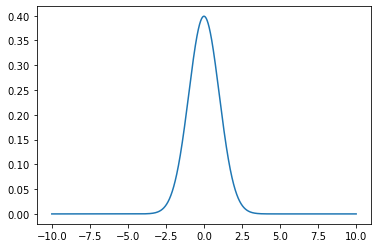

In [18]:
x = np.linspace(-10 ,10, 10000)
y = gau(x ,1,0)
plt.plot(x,y)

In [23]:
gau(2,10,5)

0.038138781546052415

In [24]:
def blue(M):
    if M < -26.571:
        y = 0
        return y
    else if M < 19.539:
        y = 0.46 + 0.07 * ()
        
def cdf(M,mu_blue,sigma_blue,mu_red,sigma_red):
    y = blue(M) * norm(M,loc = mu_blue,scale = sigma_blue) + (1 - blue(M)) * norm(M,loc = mu_red,scale = sigma_red)

In [25]:
blue

NameError: name 'blue' is not defined